In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


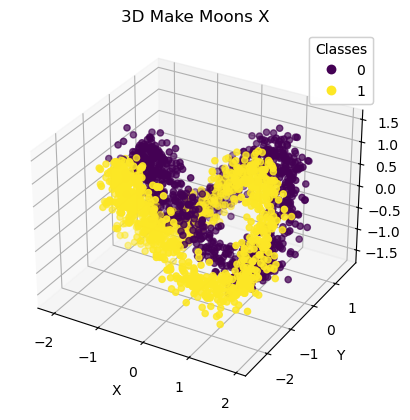

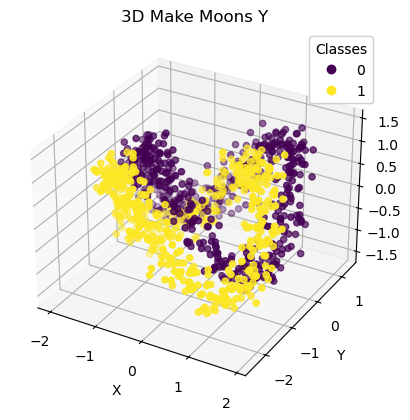

In [2]:
#生成训练集与测试集
def make_moons_3d(n_samples=500, noise=0.1):
    # Generate the original 2D make_moons data
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = 1.5 * np.cos(t)
    y = np.sin(t)
    z = np.sin(2 * t)  # Adding a sinusoidal variation in the third dimension

    # Concatenating the positive and negative moons with an offset and noise
    X = np.vstack([np.column_stack([x, y, z]), np.column_stack([-x, y - 1, -z])])
    y = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

    # Adding Gaussian noise
    X += np.random.normal(scale=noise, size=X.shape)

    return X, y

# Generate the data (1000 datapoints)
X, X_labels = make_moons_3d(n_samples=1000, noise=0.2)
Y, Y_labels = make_moons_3d(n_samples=500, noise=0.2)
# Plotting for X
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X_labels, cmap='viridis', marker='o')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Make Moons X')
plt.show()
# Plotting for Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
satter = ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=Y_labels, cmap='viridis', marker='o')
legend2 = ax.legend(*satter.legend_elements(), title="Classes")
ax.add_artist(legend2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Make Moons Y')
plt.show()

Kernel: linear, Accuracy: 0.68
Kernel: poly, Accuracy: 0.78
Kernel: rbf, Accuracy: 0.98
Kernel: sigmoid, Accuracy: 0.57


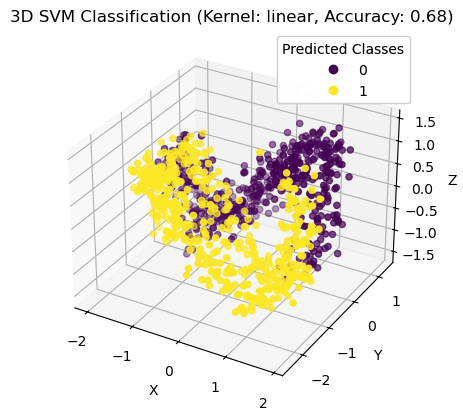

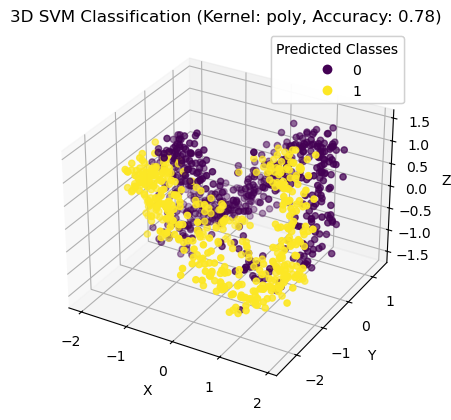

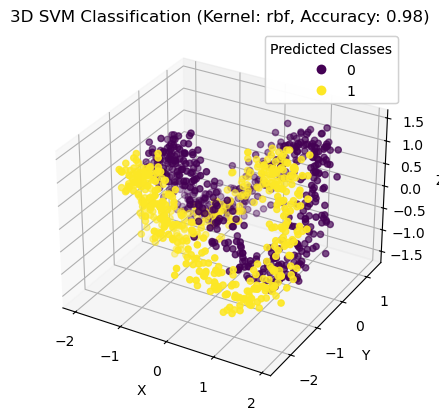

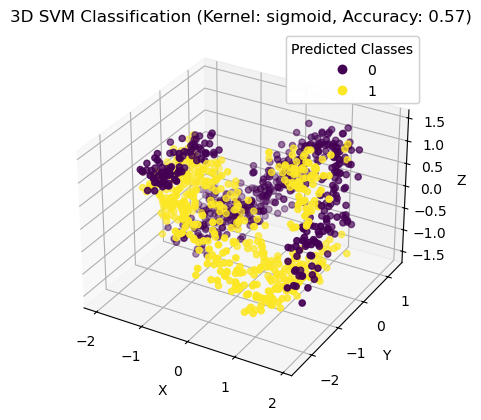

In [3]:
scaler = StandardScaler()   # 标准化
X_scaled = scaler.fit_transform(X)  
Y_scaled = scaler.fit_transform(Y)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_clfs = [SVC(kernel=k,C=1.0,gamma='scale',random_state=42).fit(X_scaled, X_labels) for k in kernels] # 创建模型并训练
Y_preds = [svm_clf.predict(Y_scaled) for svm_clf in svm_clfs]   # 预测
accuracies = [accuracy_score(Y_labels, Y_pred) for Y_pred in Y_preds]   #计算准确率
#打印准确率
for i, kernel in enumerate(kernels):
    accuracy = accuracies[i]
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")
# 可视化每种核函数的分类结果
for i, kernel in enumerate(kernels):
    Y_pred = Y_preds[i]
    accuracy = accuracies[i]
    
    # 创建 3D 图形
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制测试集的分类结果
    scatter = ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=Y_pred, cmap='viridis', marker='o')
    legend1 = ax.legend(*scatter.legend_elements(), title="Predicted Classes")
    ax.add_artist(legend1)
    
    # 设置坐标轴标签
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # 设置标题，显示核函数名称和准确率
    plt.title(f'3D SVM Classification (Kernel: {kernel}, Accuracy: {accuracy:.2f})')
    plt.show()
